# Text Classification 

The following assignment is based on 
Working With Text Data. (n.d.). Retrieved from https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html.   

Visualizations using the YellowBrick project:
Yellowbrick: Machine Learning Visualization. (n.d.). Retrieved from http://www.scikit-yb.org/en/latest/


In [1]:
## Getting the data

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
#import the datasets and do preliminary clean-up (remove heqaders, footers and quotes)

#when retreiving only a subset of samples to quickly test the code and then retrain a model, use
#shuffle=True, random_state = as parameters in fetch_20newsgroups() 
#to shuffle randomly before extracting a subset 

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [4]:
#dataset is loaded as a bunch object - a dictionary that supports attribute-style access
print(type(newsgroups_train))

<class 'sklearn.utils.Bunch'>


In [5]:
#Look up keys for the bunch dictionary using key() function
#the keys are 'data', 'filenames', target_names', and 'DESCR' 
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
#target_names holds labels for the data set (20 classification groups)
#The values for the labels are as follow:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
# use get() to access the number of entries in the dataset
#There are 11314 total articles for all 20 newsgroups
#the articles/posts themselves are loaded into memory in the data attribute

len(newsgroups_train.get('data'))


11314

In [8]:
# Example of an article contaiing quoted material 
#lines starting with '#' represent quotes from other articles/posts 

article = newsgroups_train.get('data')[1144]
print(article)

#>This happened about a year ago on the Washington DC Beltway.
#>Snot nosed drunken kids decided it would be really cool to
#>throw huge rocks down on cars from an overpass.  Four or five
#>cars were hit.  There were several serious injuries, and sadly
#>a small girl sitting in the front seat of one of them was struck 
#>in the head by one of the larger rocks.  I don't recall if she 
#>made it, but I think she was comatose for a month or so and 
#>doctors weren't holding out hope that she'd live.
#>
#>What the hell is happening to this great country of ours?  I
#>can see boyhood pranks of peeing off of bridges and such, but
#>20 pound rocks??!  Has our society really stooped this low??

   Yes. Nobody is watching them.  If they get caught, there is no punishment
 at all.  In the old days such behaviour would be rewarded with a whipping
 with a good-sized belt, and then taken into some hospital to see first hand
 what kind of damage such accidents cause.   Of course this doesn't happen


### Preventing Data Leakage - Deleting Quotes

In [9]:
#Example of a post from a training set quoting another post that might potentially
#end up in the tesinting set

print(newsgroups_train['data'][9514])

#>So, does anyone care to enlighten us whether DOS6.0 is worth upgrading to?
#>How good is it's compression, and can it be turned on/off at will?
#>Any other nice/nasty features?
# 
#According to reports, if you don't have DOS yet, and don't have any
#utilities (QEMM, Stacker, PCTools, Norton, ...) then DOS6 may be worth it. 
#For people who have DOS5, and some sort of utility, DOS6 doesn't offer
#much. You'd never know it from the usual hype that marketing is able
#to create, however. :-)

	IMHO, it seems to be worth the $40 to upgrade.  DoubleSpace seems a bit 
saner than Stacker 2.0 (which I've replaced).  MemMaker is nowhere near as 
aggressive as QEMM, but it doesn't hose my system like QEMM did (at least
it hasn't yet).  Microsoft AntiVirus is just the latest version (or a 
reasonably recent one) of CPAV - mine was very aged, so this was quite welcome.

 	MS-DOS 6.0 ain't the end all, be all of operating systems - but it's
better than a sharp stick in the eye, unless you happen t

Removing sources of leaks to eliminate possibility of accidentally training the model on testing data


In [10]:
import re  # python's regular expression package
import string #string operations
from nltk.tokenize import word_tokenize #
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [11]:

def clean_article(article):
    """Cleans an article and prepares it for modeling"""
    
    #use re.sub() function to replace substrings
    
    # remove lines with 'From article' and all empty lines before and after 
    cleaned = re.sub(r'\n*.*From article.*\n*', '', article)
    
    # remove quoted lines that start with '#'
    return re.sub(r'#(.*)\n', '', cleaned)    

In [12]:
# Preprocess an article to test the function
print(clean_article(article))



   Yes. Nobody is watching them.  If they get caught, there is no punishment
 at all.  In the old days such behaviour would be rewarded with a whipping
 with a good-sized belt, and then taken into some hospital to see first hand
 what kind of damage such accidents cause.   Of course this doesn't happen
 any more.  That whipping would probably save the kid's life by teaching
 him some respect for others.  A person with that little respect would
 inevitably wind up dead early anyway.

   The problem is creeping gradualism.  If you put a frog into hot water,
 he just jumps out.  But if you put him into cold water and then ever-so-
 gradually heat it, the frog will cook.  This is what the entertainment
 industry and lack of religious, moral, and educational standards in our
 modern North American society have done to us over the years.  Now that
 we are about to be 'cooked', we may have woken up too late.


  And the education system and the Religious Leaders aren't doing much 
 about it,

### Clean all articles in the dataset

In [13]:
# clean data for training and testing
cleaned_test = [clean_article(article) for article in newsgroups_test.get('data')]
cleaned_train = [clean_article(article) for article in newsgroups_train.get('data')]

In [14]:
# get the correct newsgroups (target variables) for training and testing in order to use supervised training algorithms
y_test = newsgroups_test.target
y_train = newsgroups_train.target

In [15]:
# get the labels / target names (display all existing categories)
target_names = newsgroups_test.target_names
target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Tokenizing text with sklearn

Tokenize and count the number of occurances per word by document

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
#CountVectorizer includes text preprocessing, tokenizing and filtering of stop words
#CountVectorizer builds a disctionary and transforms documents to feature vectors 
count_vect = CountVectorizer()  

In [18]:
#fit count_vect to clenead training data
x_train_counts = count_vect.fit_transform(cleaned_train)

In [19]:
#dimentions
x_train_counts.shape

(11314, 94427)

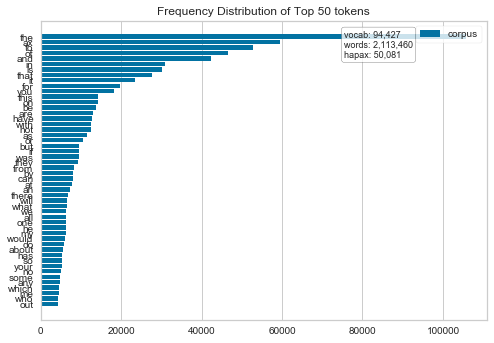

In [20]:
#EDA -  Visualizations using the Yellowbrick project
#Token Frequency Distribution
from yellowbrick.text import FreqDistVisualizer

features = count_vect.get_feature_names()
visualizer = FreqDistVisualizer(features=features) #instantiate FreqDistVisualizer
visualizer.fit(x_train_counts) #fit the object with count vectorized documents
visualizer.poof() #plot a bar chart of the top 50 most frequent terms


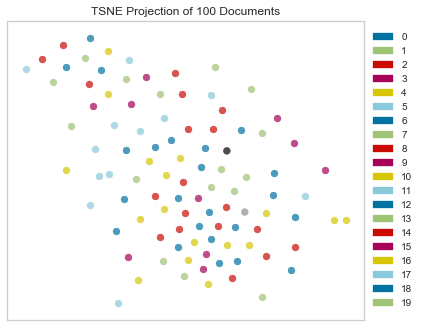

In [21]:
#NOTE: THIS STEP MIGHT TAKE A WHILE TO RUN...
#so, I used just first 100 documents instead of the whole corpus for demonstration purposes

#t-SNE, t-distributed stochastic neighbor embedding
#decomposing high-dimentional document vectors into 2 dimentions and
#cluster similar documants, visualize with scutter plot

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer() #initilize
tsne.fit(x_train_counts[:100], y_train[:100]) #fit using first 100 posts from the training dataset
#plot
tsne.poof()


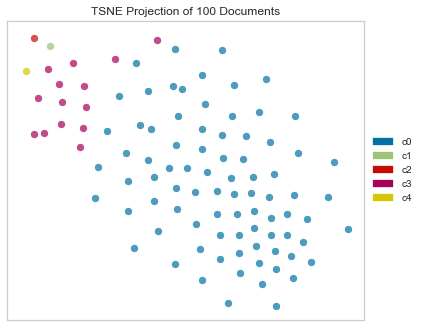

In [22]:
# Apply clustering and display cluster information instead of class names for each of the 
#first 100 documents in the training set

from sklearn.cluster import KMeans

#Cluster frist 100 posts from the training dataset using K-means clustering
clusters = KMeans(n_clusters=5) 
clusters.fit(x_train_counts[:100])

tsne = TSNEVisualizer() #initialize
tsne.fit(x_train_counts[:100], ["c{}".format(c) for c in clusters.labels_]) #fit
tsne.poof() #plot

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
#common frequencey approach
#use fit() method to fit estimator to the training data

tf_transformer = TfidfTransformer(use_idf=False).fit(x_train_counts)

In [25]:
#transform count matrix to a tf-idf (term frequency - inverse document frequency) form

x_train_tf = tf_transformer.transform(x_train_counts)

In [26]:
#matrix dimentions
x_train_tf.shape

(11314, 94427)

### One step process for creating tf_idf

In [27]:
#Combine the preparation (fit) and the altering (transform) into one step.  
#since there is use_idf=False, is is True by default, therefore common words's weights are scaled down
#to give rare (more informative words) more weight
#number of times a word is used in the document is divided by the total number of words
#words with unusually high tf_idf help find topics 
tfidf_transformer = TfidfTransformer().fit_transform(x_train_counts)

In [28]:
#matrix dimentions
tfidf_transformer.shape

(11314, 94427)

## Pipelines and Training a Naive Bayes Classifier

Pipelines - running a sequence of transformers as a group.  Model (estimator that has a 'predict' method) has to be the last entry in the pipeline. Pipeline is consuming a CountVectorizer object and produces a model.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [30]:
#building a pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])

In [31]:
# train the model through the whole pipeline using the training dataset
text_clf.fit(cleaned_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Making predictions

To make predictions we need pass the cleaned test data to the trained pipeline and call its predict method. 

In [32]:
import numpy as np

In [33]:
#use the model to make predictions
predicted = text_clf.predict(cleaned_test)

In [34]:
#Calculate model accuracy
np.mean(predicted == y_test)

0.6042219861922464

As the output above shows, the accuracy of the Naive Bayes classifier on the test data is about 60.42%.

In [35]:
## Use SVM classifier on the same data
#just change a model in the pipline

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
#building a pipeline
text_clf2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf2', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),])

In [38]:
#fitting the SVM  on training data
text_clf2.fit(cleaned_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [39]:
#Using the SVM model to make predictions
predicted2 = text_clf2.predict(cleaned_test)

In [40]:
#calculate SVM model accuracy
np.mean(predicted2 == y_test)

0.682421667551779

The SVM model shows 68.24 % overall accuracy, which is almost 8% higher than the baseline Nive Bayes classifier.

## Evaluating model performance

In [41]:
from sklearn import metrics

In [42]:
#Print detailed performance report for the Naive Bayes model
classif_report1 = metrics.classification_report(y_test, predicted, target_names=target_names)
print(classif_report1)    


                          precision    recall  f1-score   support

             alt.atheism       0.82      0.07      0.13       319
           comp.graphics       0.73      0.62      0.67       389
 comp.os.ms-windows.misc       0.70      0.51      0.59       394
comp.sys.ibm.pc.hardware       0.55      0.74      0.63       392
   comp.sys.mac.hardware       0.81      0.61      0.69       385
          comp.windows.x       0.83      0.73      0.78       395
            misc.forsale       0.87      0.69      0.77       390
               rec.autos       0.83      0.68      0.75       396
         rec.motorcycles       0.88      0.62      0.73       398
      rec.sport.baseball       0.96      0.70      0.80       397
        rec.sport.hockey       0.59      0.89      0.71       399
               sci.crypt       0.46      0.80      0.59       396
         sci.electronics       0.76      0.42      0.54       393
                 sci.med       0.86      0.64      0.73       396
         

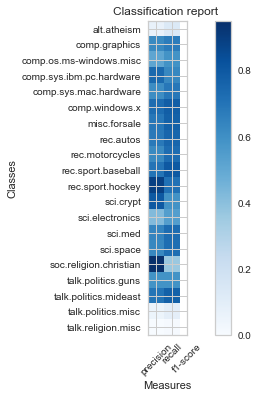

In [44]:
#Visualizing performance report for the Naive Bayes model

#adapted from by https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report 

#Required libraries imported in previous steps
#import matplotlib.pyplot as plt
#import numpy as np

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):
    """received classification report, retreives measures for each class and plots """
    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : 22]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[2:4]]
        # print(v)
        plotMat.append(v)

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')


#plot 
plot_classification_report(classif_report1)


In [45]:
#Confusion matrix for the Naive Bayes model
array1 = metrics.confusion_matrix(y_test, predicted)
array1

array([[ 23,   1,   0,   1,   1,   1,   0,   0,   2,   1,   9,   7,   1,
          2,   2, 253,   4,  10,   0,   1],
       [  0, 241,  16,  16,   7,  24,   4,   0,   2,   0,   5,  33,   0,
          0,   7,  33,   0,   1,   0,   0],
       [  0,  20, 201,  63,   5,  20,   1,   1,   2,   0,  15,  27,   0,
          1,   5,  33,   0,   0,   0,   0],
       [  0,   5,  21, 292,  19,   2,   5,   0,   0,   0,   8,  20,  12,
          0,   0,   7,   1,   0,   0,   0],
       [  0,   4,  12,  56, 234,   3,   4,   5,   1,   0,  14,  19,   6,
          2,   2,  20,   3,   0,   0,   0],
       [  0,  24,  18,  12,   0, 290,   4,   1,   0,   0,   5,  21,   2,
          0,   1,  16,   1,   0,   0,   0],
       [  0,   1,   3,  42,  13,   0, 270,  12,   2,   1,   9,   3,   5,
          0,   2,  23,   4,   0,   0,   0],
       [  0,   0,   2,   1,   0,   2,   9, 270,   7,   1,  25,  13,   8,
          3,   4,  44,   2,   3,   2,   0],
       [  0,   2,   0,   1,   0,   1,   5,  19, 247,   2,  14,  

Note: This confuusion matrix is not easily to interpret due to the large number of categories, but it can be used to claculate other performance indicators or for visualization purposes

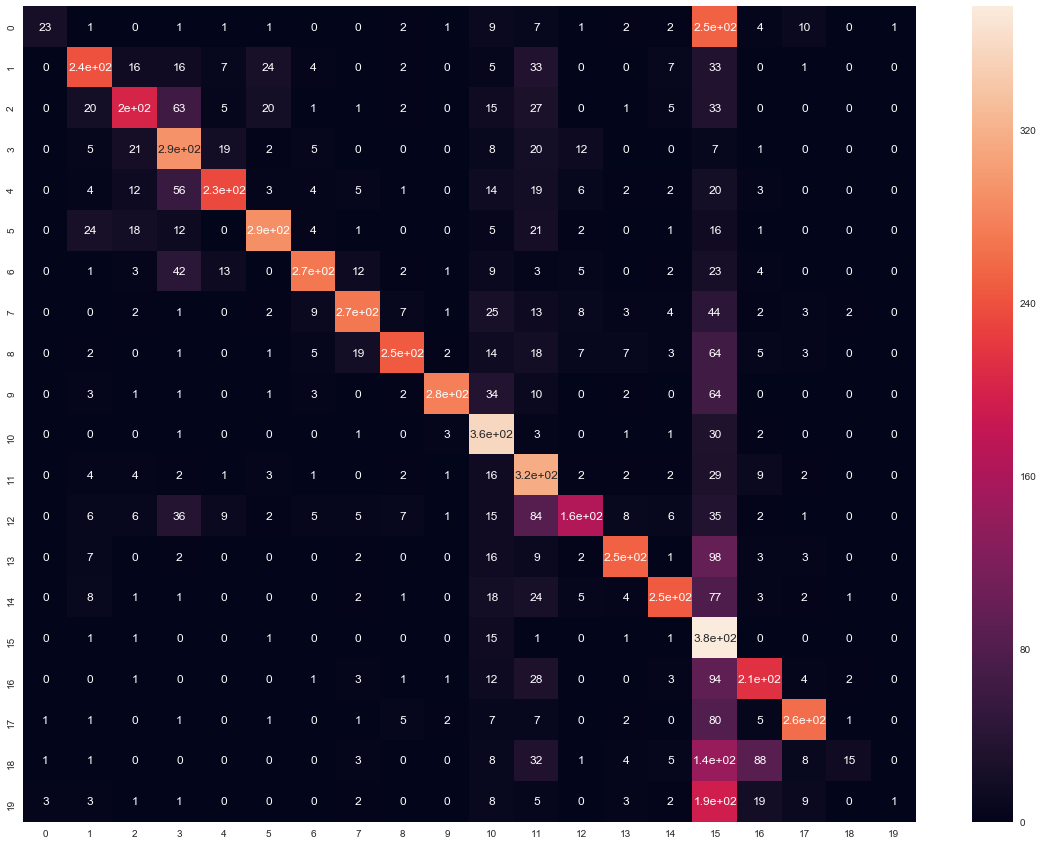

In [46]:
#Confusion matrix visualization
#inspired by https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix/42265865#42265865 

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(array1, range(20), range(20)) #data frame for the confusion mmatrix
plt.figure(figsize = (20,15)) #plot size
sn.heatmap(df_cm, annot=True) #fonts

In [47]:
#Print detailed performance report for the SVM model
print(metrics.classification_report(y_test, predicted2, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.41      0.48       319
           comp.graphics       0.68      0.67      0.68       389
 comp.os.ms-windows.misc       0.67      0.60      0.63       394
comp.sys.ibm.pc.hardware       0.65      0.65      0.65       392
   comp.sys.mac.hardware       0.75      0.68      0.71       385
          comp.windows.x       0.75      0.70      0.72       395
            misc.forsale       0.70      0.83      0.76       390
               rec.autos       0.80      0.69      0.74       396
         rec.motorcycles       0.49      0.81      0.61       398
      rec.sport.baseball       0.82      0.79      0.80       397
        rec.sport.hockey       0.82      0.91      0.86       399
               sci.crypt       0.71      0.74      0.73       396
         sci.electronics       0.67      0.48      0.56       393
                 sci.med       0.75      0.79      0.77       396
         

Note: While overall, SVM showed bettwer reuslts, performance of these two classifiers varies depending on a category. 

In [48]:
#Confusion matrix for the SVM model
metrics.confusion_matrix(y_test, predicted2)

array([[132,   0,   2,   2,   0,   1,   5,   2,  19,   5,   4,   5,   3,
         10,  18,  77,   7,  16,   0,  11],
       [  5, 262,  20,  12,   7,  22,   7,   1,  12,   4,   0,  14,   3,
          3,  12,   2,   1,   2,   0,   0],
       [  2,  15, 237,  35,  16,  25,   3,   1,  17,   4,   2,   4,   1,
          8,  11,   1,   4,   1,   5,   2],
       [  1,  13,  26, 253,  22,   8,  18,   3,   8,   1,   2,  10,  21,
          2,   2,   0,   0,   1,   0,   1],
       [  0,   7,   6,  34, 262,   9,  15,   6,  22,   1,   3,   4,   8,
          2,   4,   1,   1,   0,   0,   0],
       [  0,  41,  33,   4,   7, 278,   9,   0,   8,   0,   0,   6,   3,
          1,   4,   0,   0,   1,   0,   0],
       [  0,   3,   0,  12,   9,   0, 323,   7,  14,   2,   2,   1,   4,
          0,   5,   1,   6,   1,   0,   0],
       [  5,   1,   3,   1,   1,   3,  14, 275,  44,   4,   2,   2,  16,
          2,   7,   0,   9,   5,   2,   0],
       [  2,   0,   0,   1,   1,   0,  12,  16, 321,   3,   1,  

### Parameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#Trying parameters for the SVM modle
#either words or bigrams, with or without idf (inverse document frequencies), penalty parameter of 0.01 or 0.01

parameters = {'vect__ngram_range': [(1,1), (1,2)], 'tfidf__use_idf': (True, False), 'clf2__alpha': (1e-2, 1e-3), }

In [51]:
#Perform parameter search for the SVM model
#use n_jobs=-1 parameter to detect and use all installed cores
gs_clf2 = GridSearchCV(text_clf2, parameters, cv=5, iid=False, n_jobs=-1)


In [53]:
#Perform the search on a smaller subset of the training data in order to decrease computation time
gs_clf2 = gs_clf2.fit(cleaned_train[:500], y_train[:500])

In [54]:
#Use predict method of the GridSearchCV classifier
y_train[100:150][gs_clf2.predict(cleaned_train[100:150])]

array([12,  3,  1, 17, 11,  3,  3,  3, 12, 12,  5, 17,  4, 18,  6,  6, 10,
        4, 12,  9,  0,  1, 17,  0,  0, 12,  6, 13,  6,  1, 12, 10, 12, 11,
        9,  6,  6, 12,  8,  0, 10,  6,  8,  1,  8, 10,  8,  6,  0,  9])

In [55]:
#Use best_score_ and best_params_ attribute to access the best mean score and the parameters correspoding to that score 
gs_clf2.best_score_

0.45259142586265

In [56]:
#Display parameters
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf2.best_params_[param_name]))

#gs_clf2.cv_results_

clf2__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)
